In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# loading the dataset
titanic = pd.read_csv("../input/titanic/train.csv")
print(titanic.shape)
titanic.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# loading packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as nr
import math

%matplotlib inline

In [4]:
# dropping passengerid and name since they are not features
titanic.drop(['PassengerId', 'Name'], axis=1, inplace=True)
print(titanic.shape)
titanic.head()

(891, 10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# checking the column types
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [6]:
# changing Pclass to categorical variable
dic = {1:'Upper', 2:'Middle', 3:'Lower'}
titanic['Pclass'] = [dic[x] for x in titanic['Pclass']]
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,Lower,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,Upper,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,Lower,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,Upper,female,35.0,1,0,113803,53.1000,C123,S
4,0,Lower,male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# dropping cabin because it has got alot of missing values
titanic.drop(['Cabin'], axis=1, inplace=True)
print(titanic.shape)
titanic.head()

(891, 9)


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,Lower,male,22.0,1,0,A/5 21171,7.2500,S
1,1,Upper,female,38.0,1,0,PC 17599,71.2833,C
2,1,Lower,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,Upper,female,35.0,1,0,113803,53.1000,S
4,0,Lower,male,35.0,0,0,373450,8.0500,S


In [8]:
# checking for class imbalance
survival_counts = titanic['Survived'].value_counts()
print(survival_counts)

0    549
1    342
Name: Survived, dtype: int64


In [9]:
# removing rows with missing values
titanic.dropna(axis=0, inplace=True)
print(titanic.shape)

(712, 9)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


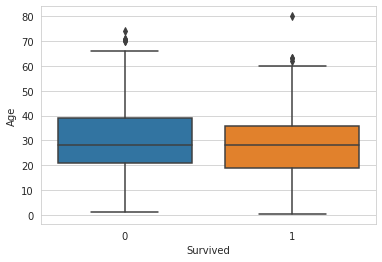

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


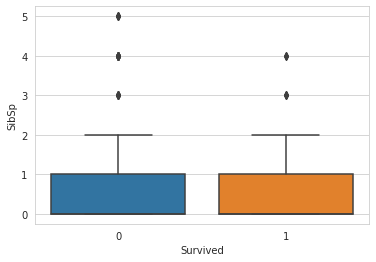

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


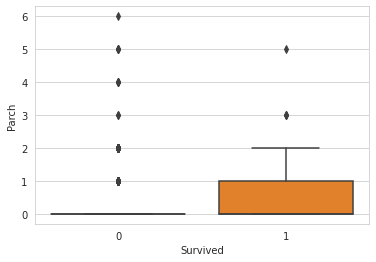

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


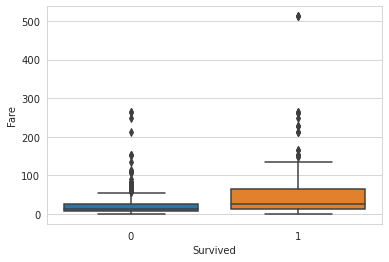

In [10]:
# visualizing class separation by numeric features
def plot_box(titanic, cols, col_x = 'Survived'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=titanic)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['Age', 'SibSp', 'Parch', 'Fare']
plot_box(titanic, num_cols)

Pclass


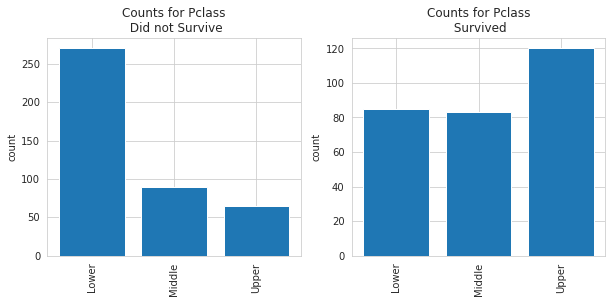

Sex


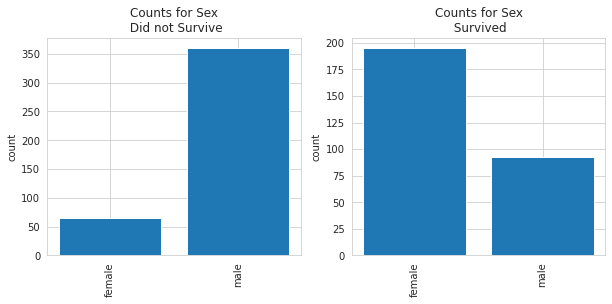

Embarked


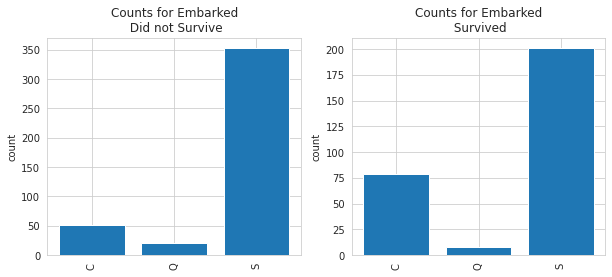

In [11]:
# visualize class separation by categorical features
cat_cols = ['Pclass', 'Sex', 'Embarked']

titanic['dummy'] = np.ones(shape = titanic.shape[0])
for col in cat_cols:
    print(col)
    counts = titanic[['dummy', 'Survived', col]].groupby(['Survived', col], as_index = False).count()
    temp = counts[counts['Survived'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['Survived'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Did not Survive')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['Survived'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Survived')
    plt.ylabel('count')
    plt.show()


In [12]:
# loading packages for logisticregression
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

In [13]:
# preparing data for scikit learn model
# craeting a numpy array of the label value
labels = np.array(titanic['Survived'])


In [14]:
# creating a model matrix for training dataset
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['Sex']

Features = encode_string(titanic['Pclass'])
print(Features.shape)
for col in categorical_columns:
    temporary = encode_string(titanic[col])
    Features = np.concatenate([Features, temporary], axis = 1)

print(Features.shape)
print(Features[:2, :])    

(712, 3)
(712, 5)
[[1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0.]]


In [15]:
# adding numeric features to the numpy array
Features = np.concatenate([Features, np.array(titanic[['Parch', 'SibSp']])], axis = 1)
print(Features.shape)
print(Features[:2, :])

(712, 7)
[[1. 0. 0. 0. 1. 0. 1.]
 [0. 0. 1. 1. 0. 0. 1.]]


In [16]:
# loading the test dataset
test_titanic = pd.read_csv("../input/titanic/test.csv")
test_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
# dropping columns
test_titanic.drop(['Name', 'Cabin', 'Age'], axis=1, inplace=True)

In [18]:
# changing pclass to categorical values
test_titanic['Pclass'] = [dic[x] for x in test_titanic['Pclass']]
print(test_titanic.shape)
test_titanic.head()

(418, 8)


,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,892,Lower,male,0,0,330911,7.8292,Q
1,893,Lower,female,1,0,363272,7.0000,S
2,894,Middle,male,0,0,240276,9.6875,Q
3,895,Lower,male,0,0,315154,8.6625,S
4,896,Lower,female,1,1,3101298,12.2875,S


In [19]:
# creating a model matrix for test dataset
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()



test_Features = encode_string(test_titanic['Pclass'])
print(test_Features.shape)
for col in categorical_columns:
    temporary_test = encode_string(test_titanic[col])
    test_Features = np.concatenate([test_Features, temporary_test], axis = 1)
print(test_Features.shape)
print(test_Features[:2, :])   

(418, 3)
(418, 5)
[[1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0.]]


In [20]:
# adding numeric features
test_Features = np.concatenate([test_Features, np.array(test_titanic[['Parch', 'SibSp']])], axis = 1)
print(test_Features.shape)
print(test_Features[:2, :]) 

(418, 7)
[[1. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 1.]]


In [21]:
# defining train  dataset
x_train = Features
y_train = labels
# defining test dataset
x_test = test_Features

In [22]:
# rescaling of the numeric features
scaler = preprocessing.StandardScaler().fit(x_train[:,5:])
x_train[:,5:] = scaler.transform(x_train[:,5:])
x_test[:,5:] = scaler.transform(x_test[:,5:])
x_train[:2,]

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -0.50678737,  0.52251079],
       [ 0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
        -0.50678737,  0.52251079]])

In [23]:
# constructing the logistic regression model
logistic_mod = linear_model.LogisticRegression() 
logistic_mod.fit(x_train, y_train)

LogisticRegression()

In [24]:
# examining model coefficients
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[0.0706021]
[[-0.95438435  0.03204198  0.9223809   1.28233936 -1.28230082 -0.01018977
  -0.16947135]]


In [25]:
# computing class probability
probabilities = logistic_mod.predict_proba(x_test)
print(probabilities[:15,:])

[[0.88767905 0.11232095]
 [0.42185317 0.57814683]
 [0.7466498  0.2533502 ]
 [0.88767905 0.11232095]
 [0.42476737 0.57523263]
 [0.88767905 0.11232095]
 [0.37815416 0.62184584]
 [0.78159421 0.21840579]
 [0.37815416 0.62184584]
 [0.91921208 0.08078792]
 [0.88767905 0.11232095]
 [0.54747769 0.45252231]
 [0.100477   0.899523  ]
 [0.77954955 0.22045045]
 [0.100477   0.899523  ]]


In [26]:
# scoring the model
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores))

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [27]:
# creating dataframe of the scores
scores_df = pd.DataFrame(scores)
scores_df.columns = ['Survived']
scores_df.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [28]:
# joining passengerid and scores
titanic_submission = pd.concat([test_titanic[['PassengerId']], scores_df], axis=1)
titanic_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [29]:
# saving the titanic_submission dataframe as csv
titanic_submission.to_csv('titanic_submission.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
